In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
def percent_scaling(series):
    return (series / 100)

def cpu_scaling(series):
    return (series * 4 / 100)

def single_cpu_scaling(series):
    return (((series - 100) * (-1)) / 100)

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [9]:
cpu_df = pd.read_csv('../results/cpu_ina3221.csv')

cpu_df['cache_hit_rate_0'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_0']) / cpu_df['cache_hit_0']
cpu_df['cache_hit_rate_1'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_1']) / cpu_df['cache_hit_1']
cpu_df['cache_hit_rate_2'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_2']) / cpu_df['cache_hit_2']
cpu_df['cache_hit_rate_3'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_3']) / cpu_df['cache_hit_3']
cpu_df['cache_hit_rate_avg'] = (cpu_df['cache_hit_rate_0'] + cpu_df['cache_hit_rate_1'] + cpu_df['cache_hit_rate_2'] + cpu_df['cache_hit_rate_3']) / 4

cpu_df['br_miss_rate_0'] = cpu_df['br_miss_0'] / cpu_df['br_insns_0']
cpu_df['br_miss_rate_1'] = cpu_df['br_miss_1'] / cpu_df['br_insns_1']
cpu_df['br_miss_rate_2'] = cpu_df['br_miss_2'] / cpu_df['br_insns_2']
cpu_df['br_miss_rate_3'] = cpu_df['br_miss_3'] / cpu_df['br_insns_3']
cpu_df['br_miss_rate_avg'] = (cpu_df['br_miss_rate_0'] + cpu_df['br_miss_rate_1'] + cpu_df['br_miss_rate_2'] + cpu_df['br_miss_rate_3']) / 4

cpu_df['clock_speed'] = (cpu_df['insns_0'] + cpu_df['insns_1'] + cpu_df['insns_2'] + cpu_df['insns_3']) / (cpu_df['time'] - cpu_df['time'].shift())

cpu_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,cpu_cycles_1,...,cache_hit_rate_1,cache_hit_rate_2,cache_hit_rate_3,cache_hit_rate_avg,br_miss_rate_0,br_miss_rate_1,br_miss_rate_2,br_miss_rate_3,br_miss_rate_avg,clock_speed
0,102957,1.232,474151,215114,87570,1293,26036,4357,228538,273849,...,1.973527,2.587425,0.775538,1.580431,0.167345,0.240231,0.222952,0.110558,0.185271,NaN
1,205020,1.204,33200,15237,5327,61,1313,192,7243,101567,...,0.265080,1.502980,0.035866,0.698119,0.146230,0.234804,0.140227,0.096557,0.154455,2.914857
2,307085,1.200,139311,57442,23623,586,5981,1524,60542,200063,...,0.698961,0.317176,0.249314,0.560161,0.254807,0.235287,0.277716,0.092037,0.214962,5.129310
3,409145,1.204,34319,15244,5323,69,1301,187,7942,108257,...,0.256924,0.243359,0.035989,0.380827,0.143736,0.250923,0.176993,0.090918,0.165642,3.320116
4,511188,1.184,75332,31368,12261,292,3011,723,28613,138932,...,0.453247,3.473295,0.109134,1.252965,0.240120,0.212384,0.132394,0.094674,0.169893,3.309487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,41697478,1.208,522897,351726,135910,1890,79202,3763,257293,80031,...,9.048836,11.055995,38.555051,14.911494,0.047511,0.197055,0.190445,0.128895,0.140977,4.237961
409,41799502,1.252,537201,359702,138864,1912,80478,3975,264448,22761,...,39.386099,39.419364,39.415957,29.801913,0.049392,0.132394,0.129577,0.128895,0.110065,3.837136
410,41901532,1.208,612813,393006,153689,2370,83504,4973,302212,62900,...,13.470640,13.058213,44.229131,17.935641,0.059554,0.185771,0.168139,0.126285,0.134937,4.535715
411,42003633,1.204,550127,367514,142536,1922,81599,4196,270847,43408,...,18.964838,40.496448,40.459682,25.226871,0.051422,0.176875,0.129630,0.131054,0.122245,4.004613


<Axes: xlabel='time'>

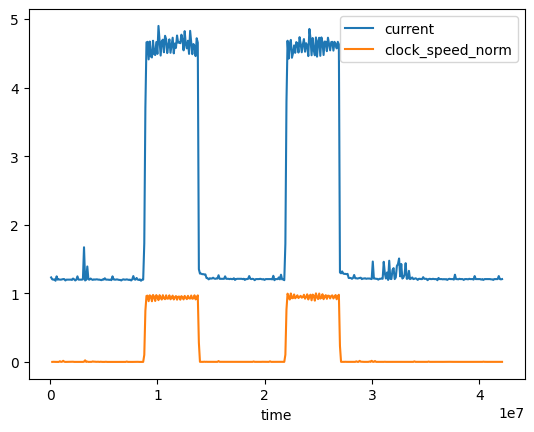

In [10]:
cpu_df['clock_speed_norm'] = min_max_scaling(cpu_df['clock_speed'])
cpu_df.plot(x='time', y=['current', 'clock_speed_norm'])

In [11]:
cpu_df.drop('time', axis=1).corr()['current']

current               1.000000
cpu_cycles_0          0.997521
insns_0               0.996190
cache_hit_0           0.996099
cache_miss_0          0.997673
br_insns_0            0.986545
br_miss_0             0.910230
bus_cycles_0          0.997521
cpu_cycles_1          0.997613
insns_1               0.997636
cache_hit_1           0.997256
cache_miss_1          0.997369
br_insns_1            0.989588
br_miss_1             0.972706
bus_cycles_1          0.997613
cpu_cycles_2          0.997632
insns_2               0.997011
cache_hit_2           0.996368
cache_miss_2          0.997810
br_insns_2            0.988380
br_miss_2             0.924878
bus_cycles_2          0.997632
cpu_cycles_3          0.997712
insns_3               0.997823
cache_hit_3           0.997328
cache_miss_3          0.997423
br_insns_3            0.990045
br_miss_3             0.991866
bus_cycles_3          0.997712
cache_hit_rate_0     -0.989278
cache_hit_rate_1     -0.425863
cache_hit_rate_2     -0.436293
cache_hi

In [12]:
mem_df = pd.read_csv('../results/mem_ina3221.csv')

mem_df['cache_hit_rate_0'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_0']) / mem_df['cache_hit_0']
mem_df['cache_hit_rate_1'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_1']) / mem_df['cache_hit_1']
mem_df['cache_hit_rate_2'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_2']) / mem_df['cache_hit_2']
mem_df['cache_hit_rate_3'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_3']) / mem_df['cache_hit_3']
mem_df['cache_hit_rate_avg'] = (mem_df['cache_hit_rate_0'] + mem_df['cache_hit_rate_1'] + mem_df['cache_hit_rate_2'] + mem_df['cache_hit_rate_3']) / 4

mem_df['br_miss_rate_0'] = mem_df['br_miss_0'] / mem_df['br_insns_0']
mem_df['br_miss_rate_1'] = mem_df['br_miss_1'] / mem_df['br_insns_1']
mem_df['br_miss_rate_2'] = mem_df['br_miss_2'] / mem_df['br_insns_2']
mem_df['br_miss_rate_3'] = mem_df['br_miss_3'] / mem_df['br_insns_3']
mem_df['br_miss_rate_avg'] = (mem_df['br_miss_rate_0'] + mem_df['br_miss_rate_1'] + mem_df['br_miss_rate_2'] + mem_df['br_miss_rate_3']) / 4

mem_df['clock_speed'] = (mem_df['insns_0'] + mem_df['insns_1'] + mem_df['insns_2'] + mem_df['insns_3']) / (mem_df['time'] - mem_df['time'].shift())

mem_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,cpu_cycles_1,...,cache_hit_rate_1,cache_hit_rate_2,cache_hit_rate_3,cache_hit_rate_avg,br_miss_rate_0,br_miss_rate_1,br_miss_rate_2,br_miss_rate_3,br_miss_rate_avg,clock_speed
0,103091,1.220,643110,259718,100384,2511,29020,6278,312957,291030,...,1.758828,1.695123,1.058736,1.371918,0.216334,0.191864,0.225391,0.090172,0.180940,NaN
1,205013,1.188,136732,61916,24377,726,6674,1529,59057,203411,...,0.643838,0.875314,0.259867,0.687309,0.229098,0.259389,0.270118,0.096786,0.213848,4.246522
2,307151,1.200,40140,18365,6545,79,1701,269,10784,153346,...,0.183929,1.850369,0.040810,0.765760,0.158142,0.204815,0.133144,0.109060,0.151290,3.521657
3,409240,1.252,277126,93322,36756,1229,9198,2789,129453,67813,...,3.186484,0.317619,0.273054,1.185930,0.303218,0.224624,0.244513,0.115911,0.222067,6.728551
4,511382,1.204,244487,107085,41759,546,12811,2230,113008,222128,...,1.037503,0.051394,0.378445,0.613567,0.174069,0.219155,0.111157,0.103482,0.151966,20.776948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,50684270,1.200,511616,348790,134005,1763,79783,3546,251596,77996,...,9.628059,38.029520,38.042602,21.671756,0.044446,0.213866,0.130127,0.131054,0.129873,3.973470
497,50786428,1.272,958477,565905,216251,1973,108082,6968,475113,205190,...,5.719811,61.409827,0.289120,17.102409,0.064470,0.198004,0.128895,0.102812,0.123545,24.021917
498,50888497,1.200,530958,359561,138818,1864,81235,3698,261255,103161,...,7.209058,15.983523,39.447698,15.906713,0.045522,0.200274,0.179889,0.143266,0.142238,4.334842
499,50990529,1.200,583022,375081,146130,2127,82270,4381,287404,131372,...,5.911712,41.482680,41.503125,22.470740,0.053251,0.192144,0.127479,0.131054,0.125982,4.478713


<Axes: xlabel='time'>

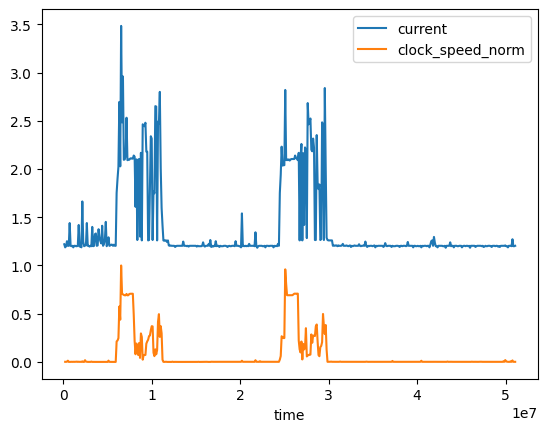

In [14]:
mem_df['clock_speed_norm'] = min_max_scaling(mem_df['clock_speed'])
mem_df.plot(x='time', y=['current', 'clock_speed_norm'])

In [15]:
mem_df.drop('time', axis=1).corr()['current']

current               1.000000
cpu_cycles_0          0.212476
insns_0               0.059911
cache_hit_0           0.057661
cache_miss_0          0.060474
br_insns_0            0.019123
br_miss_0             0.095477
bus_cycles_0          0.211603
cpu_cycles_1          0.315993
insns_1               0.335506
cache_hit_1           0.324008
cache_miss_1          0.300544
br_insns_1            0.335745
br_miss_1             0.345209
bus_cycles_1          0.315877
cpu_cycles_2          0.610795
insns_2               0.537436
cache_hit_2           0.558833
cache_miss_2          0.357205
br_insns_2            0.489268
br_miss_2             0.328843
bus_cycles_2          0.610773
cpu_cycles_3          0.577436
insns_3               0.473953
cache_hit_3           0.527387
cache_miss_3          0.304400
br_insns_3            0.406651
br_miss_3             0.316658
bus_cycles_3          0.577495
cache_hit_rate_0     -0.158351
cache_hit_rate_1     -0.258068
cache_hit_rate_2     -0.190069
cache_hi